Link to Download the data folder: https://drive.google.com/drive/folders/1JTjmLLzUT1J_a6WO6xJpxXXQDR4fNEGW?usp=sharing

# Text processing

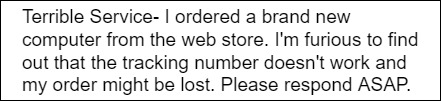

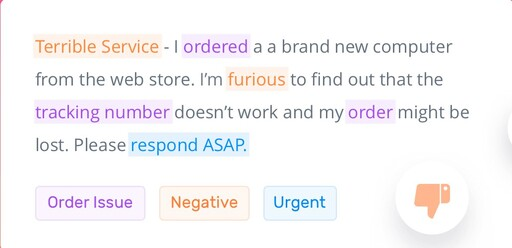

## Problem Statement: Compute the similarity between answers of students and the correct amswer using only keywords!

In [47]:
import pandas as pd


df = pd.read_csv("./textData.csv")
df

,Question Number,Answer,Marks,Correct Answer
0,1.1,High risk problems are address in the prototyp...,3.5,To simulate the behaviour of portions of the d...
1,1.1,To simulate portions of the desired final prod...,5.0,To simulate the behaviour of portions of the d...
2,1.1,A prototype program simulates the behaviors of...,4.0,To simulate the behaviour of portions of the d...
3,1.1,Defined in the Specification phase a prototype...,5.0,To simulate the behaviour of portions of the d...
4,1.1,It is used to let the users have a first idea ...,3.0,To simulate the behaviour of portions of the d...
...,...,...,...,...
133,1.6,After declaration of the variable's data type.,1.0,Variables can be declared anywhere in a progra...
134,1.6,"anywhere in the code, can be at the top, or in...",3.0,Variables can be declared anywhere in a progra...
135,1.6,Before they are used.,2.0,Variables can be declared anywhere in a progra...
136,1.6,Anywhere in the same scope before they are used,3.5,Variables can be declared anywhere in a progra...


In [48]:
## first correct answer
correct_ans = df['Correct Answer'][0]
correct_ans

'To simulate the behaviour of portions of the desired software product.'

In [49]:
correct_ans = correct_ans.lower()
correct_ans

'to simulate the behaviour of portions of the desired software product.'

## Tokenization

In [50]:
correct_ans.split()

['to',
 'simulate',
 'the',
 'behaviour',
 'of',
 'portions',
 'of',
 'the',
 'desired',
 'software',
 'product.']

In [51]:
# !pip install nltk

import nltk
from nltk import word_tokenize

In [52]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/harshit/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [53]:
correct_ans = word_tokenize(correct_ans)
correct_ans

['to',
 'simulate',
 'the',
 'behaviour',
 'of',
 'portions',
 'of',
 'the',
 'desired',
 'software',
 'product',
 '.']

In [54]:
from nltk.corpus import stopwords
nltk.download('stopwords') # downloads the corpus of common/stop words


stop_w = stopwords.words('english')
len(stop_w)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/harshit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


179

In [55]:
stop_w

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [56]:
stop_w.extend('.')
correct_ans = [word for word in correct_ans if word not in stop_w]
correct_ans

['simulate', 'behaviour', 'portions', 'desired', 'software', 'product']

## Stemming

In [57]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()
stem_words = [ps.stem(word) for word in correct_ans]
stem_words

['simul', 'behaviour', 'portion', 'desir', 'softwar', 'product']

## Lemmatization

In [58]:
from nltk.stem import WordNetLemmatizer
nltk.download('omw')


[nltk_data] Downloading package omw to /Users/harshit/nltk_data...
[nltk_data]   Package omw is already up-to-date!


True

In [59]:
# from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')



[nltk_data] Downloading package omw-1.4 to /Users/harshit/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [60]:
lemmatizer = WordNetLemmatizer()
lem_words = [ lemmatizer.lemmatize(word) for word in correct_ans]

lem_words


['simulate', 'behaviour', 'portion', 'desired', 'software', 'product']

## Checking the similarity of student 1 & 4's answers with the correct answer

In [61]:
answers = [df['Answer'][1]]
answers.append(df['Answer'][4])
answers

['To simulate portions of the desired final product with a quick and easy program that does a small specific job. It is a way to help see what the problem is and how you may solve it in the final project.',
 'It is used to let the users have a first idea of the completed program and allow the clients to evaluate the program. This can generate much feedback including software specifications and project estimations of the total project.']

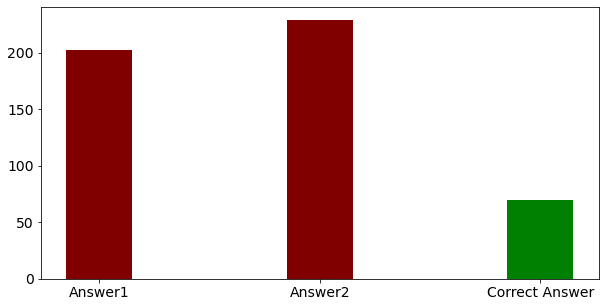

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 14})

values = [len(ans) for ans in answers]
plt.bar(['Answer1', 'Answer2'], values, color='maroon', width=0.3)
plt.bar(['Correct Answer'], [len(df['Correct Answer'][0])], color='green', width=0.3 )
plt.show()



Text(0, 0.5, 'Number of words')

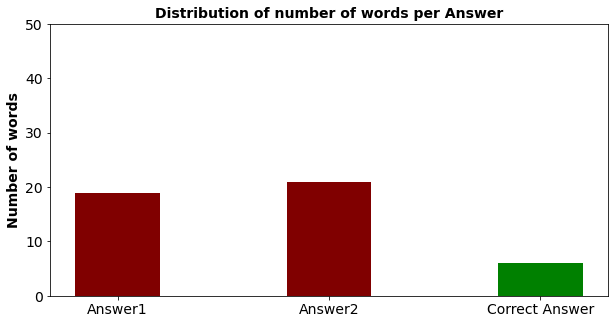

In [63]:
student1 = answers[0]

## student 1 processing
student1 = student1.lower()
tokens = word_tokenize(student1)
cleaned_tokens = [tok for tok in tokens if tok not in stop_w]
stems = [ps.stem(w) for w in cleaned_tokens]


## student 4 processing
student4 = answers[1]
student4 = student4.lower()
tokens = word_tokenize(student4)
cleaned_tokens = [tok for tok in tokens if tok not in stop_w]
stems4 = [ps.stem(w) for w in cleaned_tokens]


## correct answer stemming
correct_ans = stem_words



plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 14})
values = [len(answer) for answer in answers]
plt.bar(['Answer1','Answer2'], [len(stems),len(stems4)] , color ='maroon',width = 0.4)
plt.bar(['Correct Answer'], [len(correct_ans)], color ='green',width = 0.4)

plt.title('Distribution of number of words per Answer',weight='bold',fontsize=14)
plt.ylim(0,50)
plt.ylabel("Number of words",weight='bold',fontsize=14)



In [64]:
stems

['simul',
 'portion',
 'desir',
 'final',
 'product',
 'quick',
 'easi',
 'program',
 'small',
 'specif',
 'job',
 'way',
 'help',
 'see',
 'problem',
 'may',
 'solv',
 'final',
 'project']

## Converting text to numbers based on frequency

In [65]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()


docs = [
    ' '.join(correct_ans),
    ' '.join(stems),
    ' '.join(stems4)
]

x1 = vectorizer.fit_transform(docs)
x1

<3x35 sparse matrix of type '<class 'numpy.int64'>'
	with 43 stored elements in Compressed Sparse Row format>

In [ ]:
df = pd.DataFrame(x1.toarray(), index=['Correct Answer', 'Answer1', 'Answer2'],
                 columns=vectorizer.get_feature_names())

df



In [45]:
vectorizer.get_feature_names()

/Users/harshit/miniconda3/envs/dsml_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['allow',
 'behaviour',
 'client',
 'complet',
 'desir',
 'easi',
 'estim',
 'evalu',
 'feedback',
 'final',
 'first',
 'gener',
 'help',
 'idea',
 'includ',
 'job',
 'let',
 'may',
 'much',
 'portion',
 'problem',
 'product',
 'program',
 'project',
 'quick',
 'see',
 'simul',
 'small',
 'softwar',
 'solv',
 'specif',
 'total',
 'use',
 'user',
 'way']

In [40]:
import numpy as np
import seaborn as sns


def cosine_similarity(A, B):
    return np.dot(A,B) / (np.linalg.norm(A) * np.linalg.norm(B))

In [43]:
cosine_similarity(ans1, correct_ans)

0.35634832254989923

In [41]:
array = df.values
correct_ans = array[0]
ans1 = array[1]
ans2 = array[2]

score1 = cosine_similarity(ans1, ans1)
score2 = cosine_similarity(correct_ans, ans1)
score3 = cosine_similarity(ans1, ans2)

score4 = cosine_similarity(correct_ans, ans2)
score5 = cosine_similarity(ans2, ans2)

score6 = cosine_similarity(correct_ans, correct_ans)

output = [ [score1, score2, score3], [score2, score6, score4], [score3, score4, score5] ]




In [42]:
output = pd.DataFrame(output, index=['Answer1','Correct Answer','Answer2'], columns=['Answer1','Correct Answer','Answer2'])
output




,Answer1,Correct Answer,Answer2
Answer1,1.000000,0.356348,0.218218
Correct Answer,0.356348,1.000000,0.081650
Answer2,0.218218,0.081650,1.000000


Text(65.0, 0.5, ' ')

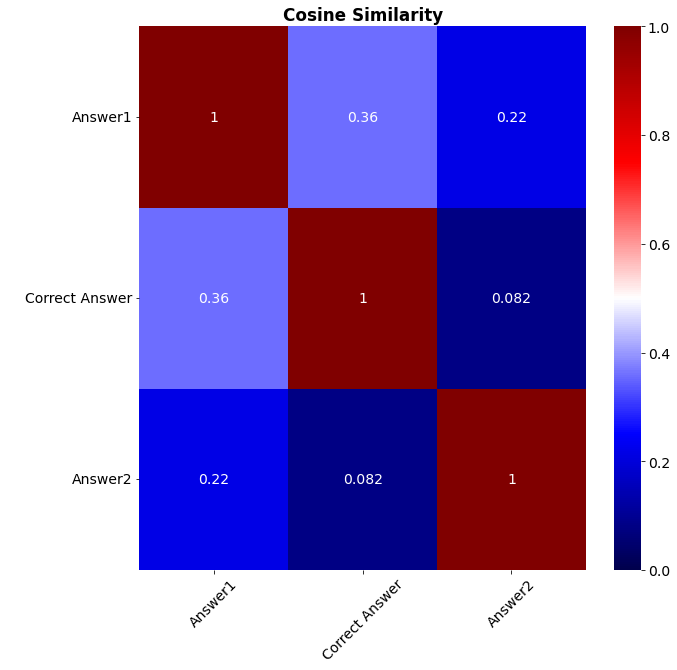

In [44]:
plt.figure(figsize=(10,10))
plt.title('Cosine Similarity',weight='bold')

sns.heatmap(output,vmin=0.0,vmax=1.0,cmap='seismic',annot=True)
plt.tick_params(labelbottom=True)
plt.yticks(rotation=0)
plt.xticks(rotation=45)

plt.ylabel(' ')